# 데이터 불러오기
## SELECT 문으로 불러오기

In [1]:
import pandas as pd
import numpy as np
import sqlite3

In [2]:
con = sqlite3.connect("lpoint.db", isolation_level=None)

In [3]:
# 01_DEMO
demo = pd.read_sql("SELECT * FROM DEMO", con, index_col=None)
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29913 entries, 0 to 29912
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   cust       29913 non-null  object
 1   ma_fem_dv  29913 non-null  object
 2   ages       29913 non-null  object
 3   zon_hlv    29913 non-null  object
dtypes: object(4)
memory usage: 934.9+ KB


In [4]:
# 06_LPAY
lpay = pd.read_sql("SELECT * FROM LPAY", con, index_col=None)
lpay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353184 entries, 0 to 353183
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   cust     353184 non-null  object
 1   rct_no   353184 non-null  int64 
 2   cop_c    353184 non-null  object
 3   chnl_dv  353184 non-null  int64 
 4   de_dt    353184 non-null  int64 
 5   de_hr    353184 non-null  int64 
 6   buy_am   353184 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 18.9+ MB


## 두 데이터 합치기

In [6]:
data = pd.merge(lpay, demo, on = 'cust', how = 'left')
data.head()

,cust,rct_no,cop_c,chnl_dv,de_dt,de_hr,buy_am,ma_fem_dv,ages,zon_hlv
0,M629656521,210803210311226,A03,1,20210803,21,10900,남성,40대,Z04
1,M216016456,210803130167542,L01,2,20210803,13,6860,여성,40대,Z04
2,M205142844,210803140275112,A02,1,20210803,14,9000,여성,60대,Z17
3,M737010483,210803040637594,A06,2,20210803,4,36740,남성,40대,Z16
4,M707775545,210803140675502,A06,2,20210803,14,138500,남성,30대,Z11


In [8]:
data.columns = ['고객번호', '영수증번호', '제휴사', '채널구분', '이용일자', '이용시간', '이용금액', '성별', '연령대', '거주지분류대코드']
data.head()

,고객번호,영수증번호,제휴사,채널구분,이용일자,이용시간,이용금액,성별,연령대,거주지분류대코드
0,M629656521,210803210311226,A03,1,20210803,21,10900,남성,40대,Z04
1,M216016456,210803130167542,L01,2,20210803,13,6860,여성,40대,Z04
2,M205142844,210803140275112,A02,1,20210803,14,9000,여성,60대,Z17
3,M737010483,210803040637594,A06,2,20210803,4,36740,남성,40대,Z16
4,M707775545,210803140675502,A06,2,20210803,14,138500,남성,30대,Z11


In [9]:
data.to_csv("./data/lpay.csv", index = False, encoding='utf-8')

# 데이터 분석

In [10]:
data = pd.read_csv('./data/lpay.csv', encoding='utf-8')
data

,고객번호,영수증번호,제휴사,채널구분,이용일자,이용시간,이용금액,성별,연령대,거주지분류대코드
0,M629656521,210803210311226,A03,1,20210803,21,10900,남성,40대,Z04
1,M216016456,210803130167542,L01,2,20210803,13,6860,여성,40대,Z04
2,M205142844,210803140275112,A02,1,20210803,14,9000,여성,60대,Z17
3,M737010483,210803040637594,A06,2,20210803,4,36740,남성,40대,Z16
4,M707775545,210803140675502,A06,2,20210803,14,138500,남성,30대,Z11
...,...,...,...,...,...,...,...,...,...,...
353179,M470112503,210125110644545,A06,2,20210125,11,51800,여성,50대,Z16
353180,M470112503,210104210652271,A06,2,20210104,21,6440,여성,50대,Z16
353181,M748878049,210119200278240,A02,1,20210119,20,17600,여성,30대,Z10
353182,M748878049,210119180267206,A02,1,20210119,18,12400,여성,30대,Z10


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353184 entries, 0 to 353183
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   고객번호      353184 non-null  object
 1   영수증번호     353184 non-null  int64 
 2   제휴사       353184 non-null  object
 3   채널구분      353184 non-null  int64 
 4   이용일자      353184 non-null  int64 
 5   이용시간      353184 non-null  int64 
 6   이용금액      353184 non-null  int64 
 7   성별        353184 non-null  object
 8   연령대       353184 non-null  object
 9   거주지분류대코드  353184 non-null  object
dtypes: int64(5), object(5)
memory usage: 26.9+ MB


## 단순시각화

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

* A01~06 : 유통사
* B01: 숙박업종
* C01~2: 엔터테인먼트
* D01~2: F&B
* E01: 렌탈업종
* L00 : 기타 제휴사
* L01 : 비 제휴사

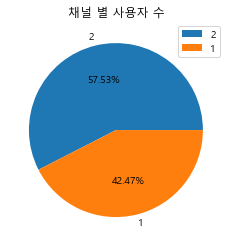

In [64]:
## 채널(1:오프라인 / 2:온라인) 구분
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.pie(data['채널구분'].value_counts().tolist(), labels=data['채널구분'].value_counts().keys(),
       autopct=lambda p : '{:.2f}%'.format(p))
plt.title('채널 별 사용자 수')
plt.legend()
plt.show()

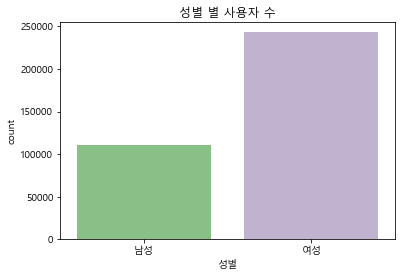

In [66]:
## 성별 별 사용자 수
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 깨짐 때문에 넣은 코드
plt.title('성별 별 사용자 수')
sns.countplot(x='성별', palette='Accent', data=data)
plt.show()

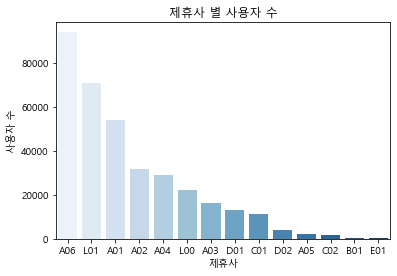

In [72]:
## 제휴사 별 사용자 수
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.countplot(data=data, x='제휴사', palette='Blues',
             order = data['제휴사'].value_counts().index)
plt.title('제휴사 별 사용자 수')
plt.ylabel('사용자 수')
plt.show()

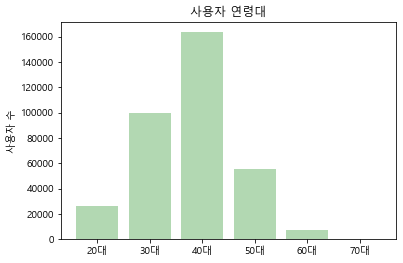

In [71]:
## 연령대 별 사용자 수
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.bar(x=data['연령대'].value_counts().sort_index().index,
        height=data['연령대'].value_counts().sort_index().tolist(),
        color = 'green', alpha = 0.3)
plt.title('사용자 연령대')
plt.ylabel('사용자 수')
plt.show()

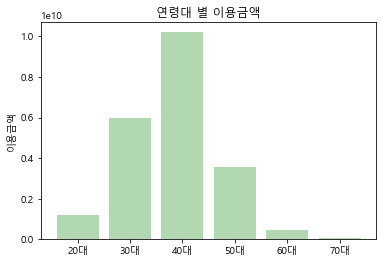

In [70]:
## 연령대 별 이용금액
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.bar(x=['20대', '30대', '40대', '50대', '60대', '70대'],
        height=data.groupby('연령대')['이용금액'].sum(),
        color = 'green', alpha = 0.3)
plt.title('연령대 별 이용금액')
plt.ylabel('이용금액')
plt.show()

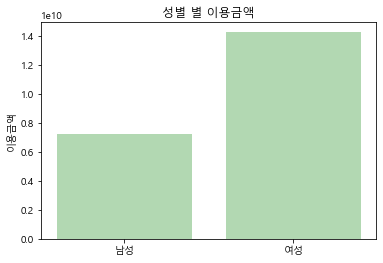

In [69]:
## 성별 별 이용금액
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.bar(x=['남성', '여성'],
        height=data.groupby('성별')['이용금액'].sum(),
        color = 'green', alpha = 0.3)
plt.title('성별 별 이용금액')
plt.ylabel('이용금액')
plt.show()

### 날짜 별 시각화

In [73]:
data['이용일자']

0         20210803
1         20210803
2         20210803
3         20210803
4         20210803
            ...   
353179    20210125
353180    20210104
353181    20210119
353182    20210119
353183    20210119
Name: 이용일자, Length: 353184, dtype: int64

In [77]:
data.이용일자 = data.이용일자.astype('str') 
data['이용일자'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 353184 entries, 0 to 353183
Series name: 이용일자
Non-Null Count   Dtype 
--------------   ----- 
353184 non-null  object
dtypes: object(1)
memory usage: 2.7+ MB


# 연관분석

In [79]:
data.head()

,고객번호,영수증번호,제휴사,채널구분,이용일자,이용시간,이용금액,성별,연령대,거주지분류대코드
0,M629656521,210803210311226,A03,1,20210803,21,10900,남성,40대,Z04
1,M216016456,210803130167542,L01,2,20210803,13,6860,여성,40대,Z04
2,M205142844,210803140275112,A02,1,20210803,14,9000,여성,60대,Z17
3,M737010483,210803040637594,A06,2,20210803,4,36740,남성,40대,Z16
4,M707775545,210803140675502,A06,2,20210803,14,138500,남성,30대,Z11


In [82]:
data['이용시간'].unique()

array([21, 13, 14,  4, 18, 16, 19, 11, 17, 12, 15, 10,  5, 23, 22, 20,  6,
        7,  0,  9,  8,  1,  2,  3], dtype=int64)

In [83]:
# 영수증번호가 중복되는지 확인
print('영수증번호 개수:', len(data['영수증번호'].unique()))
data['영수증번호'].unique()

영수증번호 개수: 353184


array([210803210311226, 210803130167542, 210803140275112, ...,
       210119200278240, 210119180267206, 210119150154756], dtype=int64)